# Supervised Learning Project - Tree Methods Focus 

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----

## Imports and Read in the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Data Check

In [4]:
# Confirming quickly with .info() methods the datatypes and non-null values in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [5]:
# Getting a quick statistical summary of the numeric columns. Many columns are categorical, meaning it will eventually converted
# into dummy variable
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis

## General Feature Exploration

In [6]:
# Checking if there are NaN cells
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

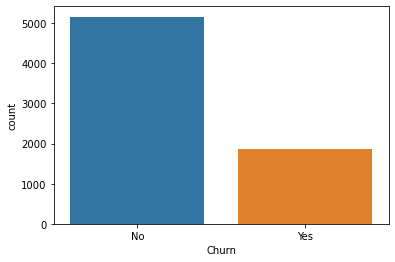

In [7]:
# Display the balance of the class labels (Churn)
sns.countplot(data=df,x='Churn');

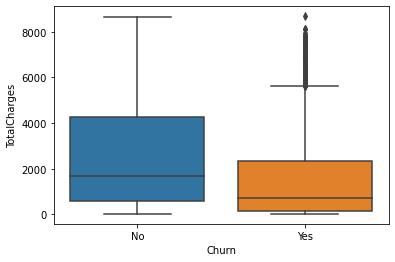

In [8]:
# Exploring the distrbution of TotalCharges between Churn categories
sns.boxplot(data=df,y='TotalCharges',x='Churn');

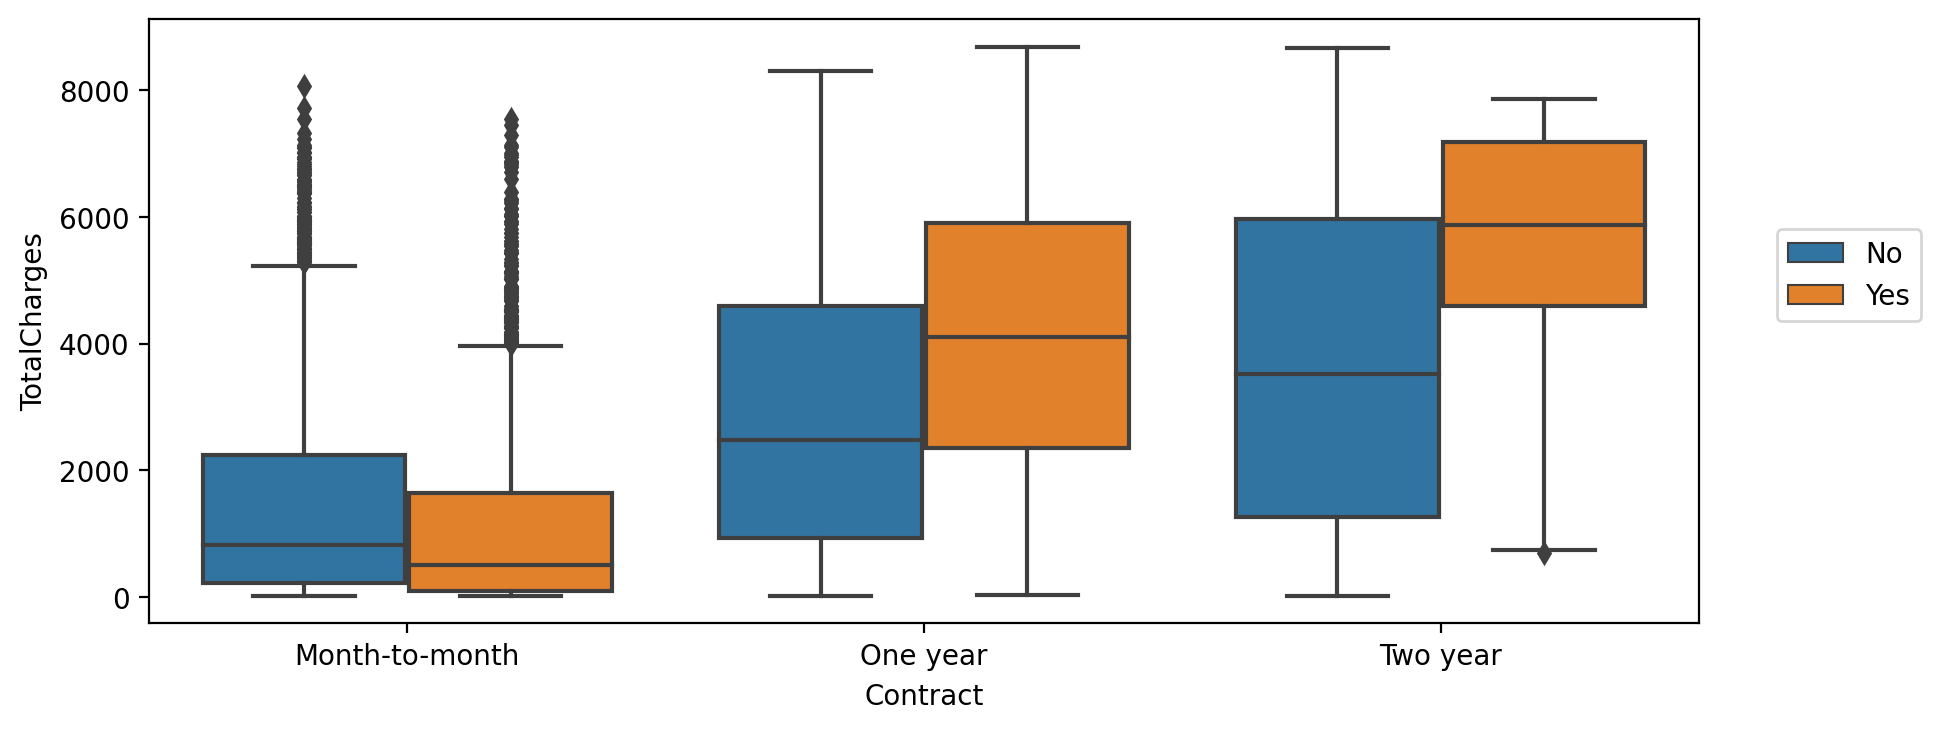

In [9]:
# Creating a boxplot showing the distribution of TotalCharges per Contract type colored by churn class 
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract', hue='Churn')
plt.legend(loc=(1.05,0.5))
plt.show()

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Dummyfing categorical label and showing the correlation of some features to the class label
corr_df  = pd.get_dummies(df.drop(columns='customerID')).corr()
churn_yes_corr = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

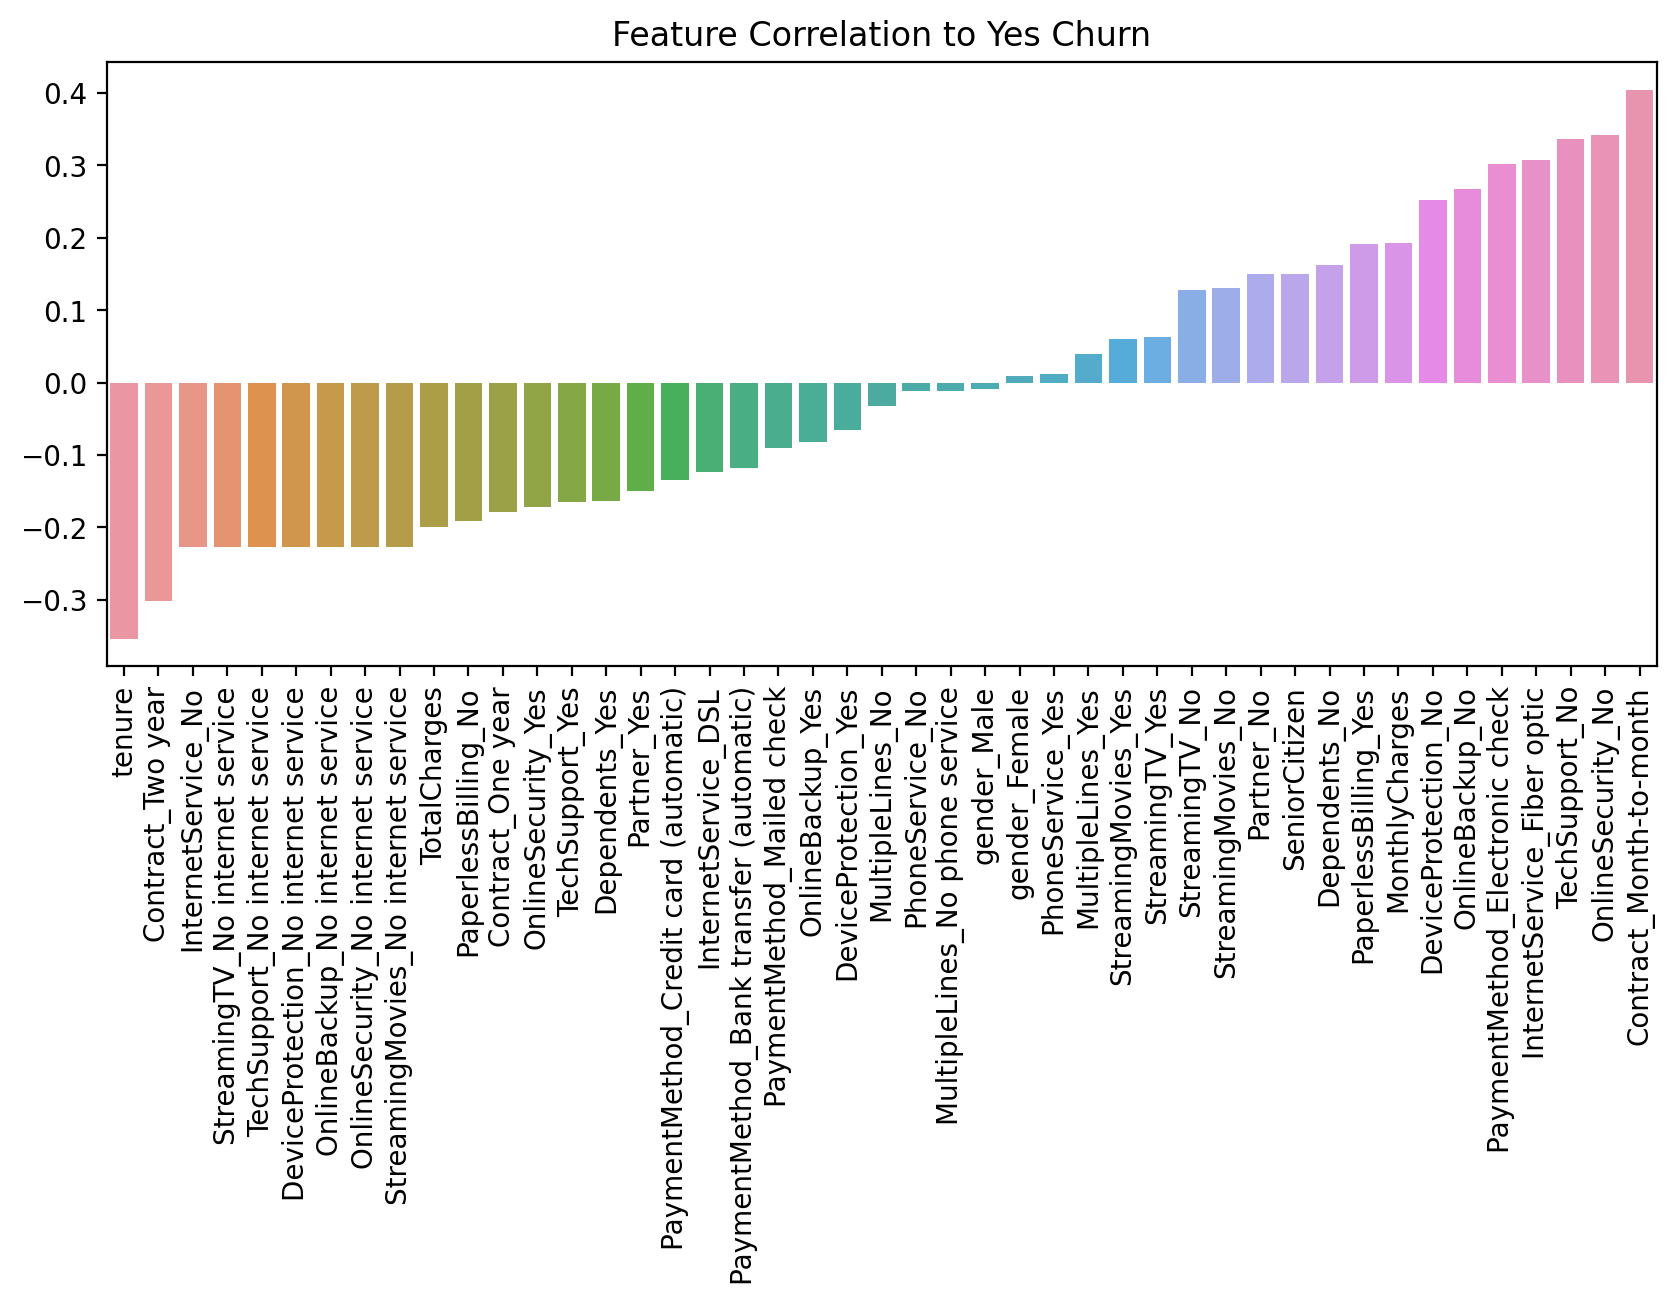

In [12]:
# Plotting the correlation above
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=churn_yes_corr.index,y=churn_yes_corr.values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

---
---

# Churn Analysis

**segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [13]:
# Showing the 3 contract types
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

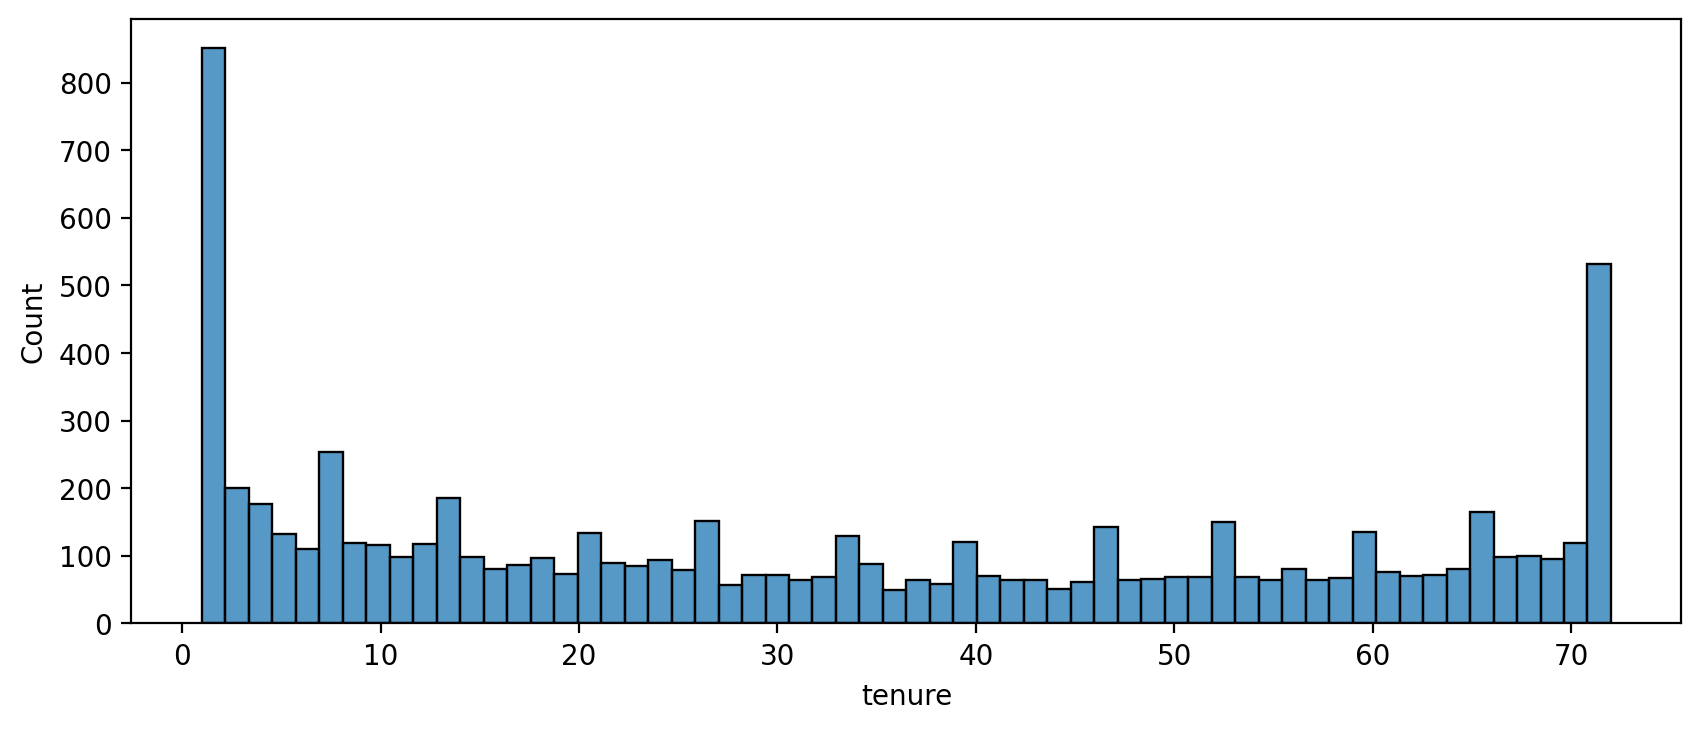

In [14]:
# Creating a histogram displaying the distribution of 'tenure' column, 
# which is the amount of months a customer was or has been on a customer

plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60);

<Figure size 2000x600 with 0 Axes>

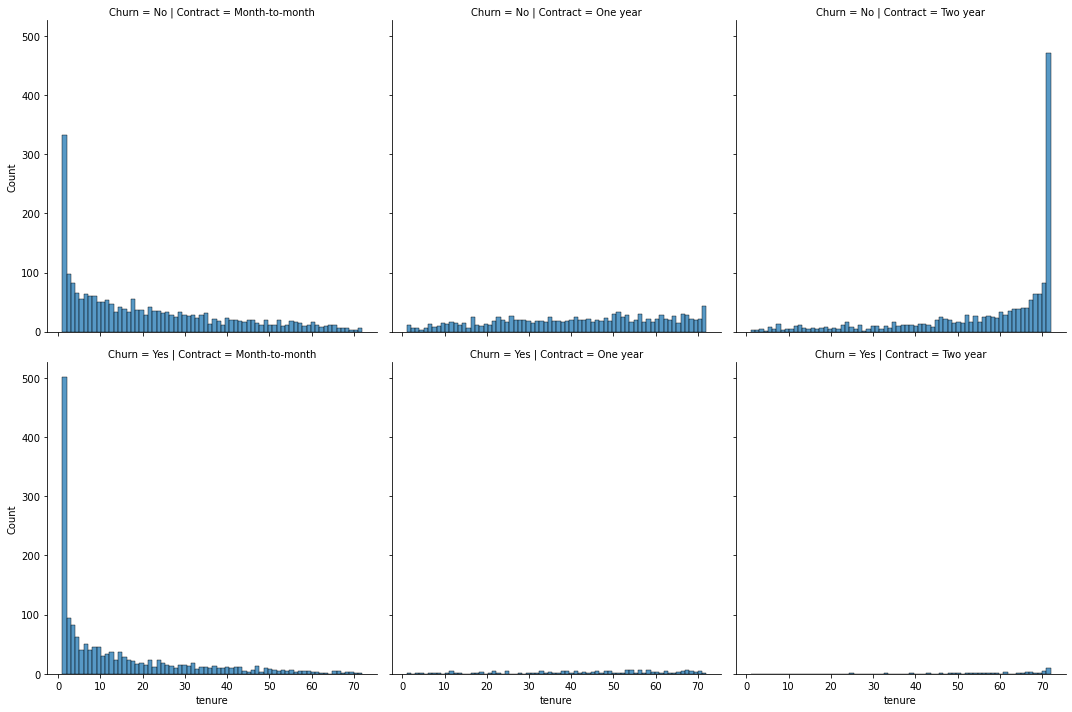

In [15]:
# creating histograms separated by two features, Churn and Contract

plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn')
plt.show();

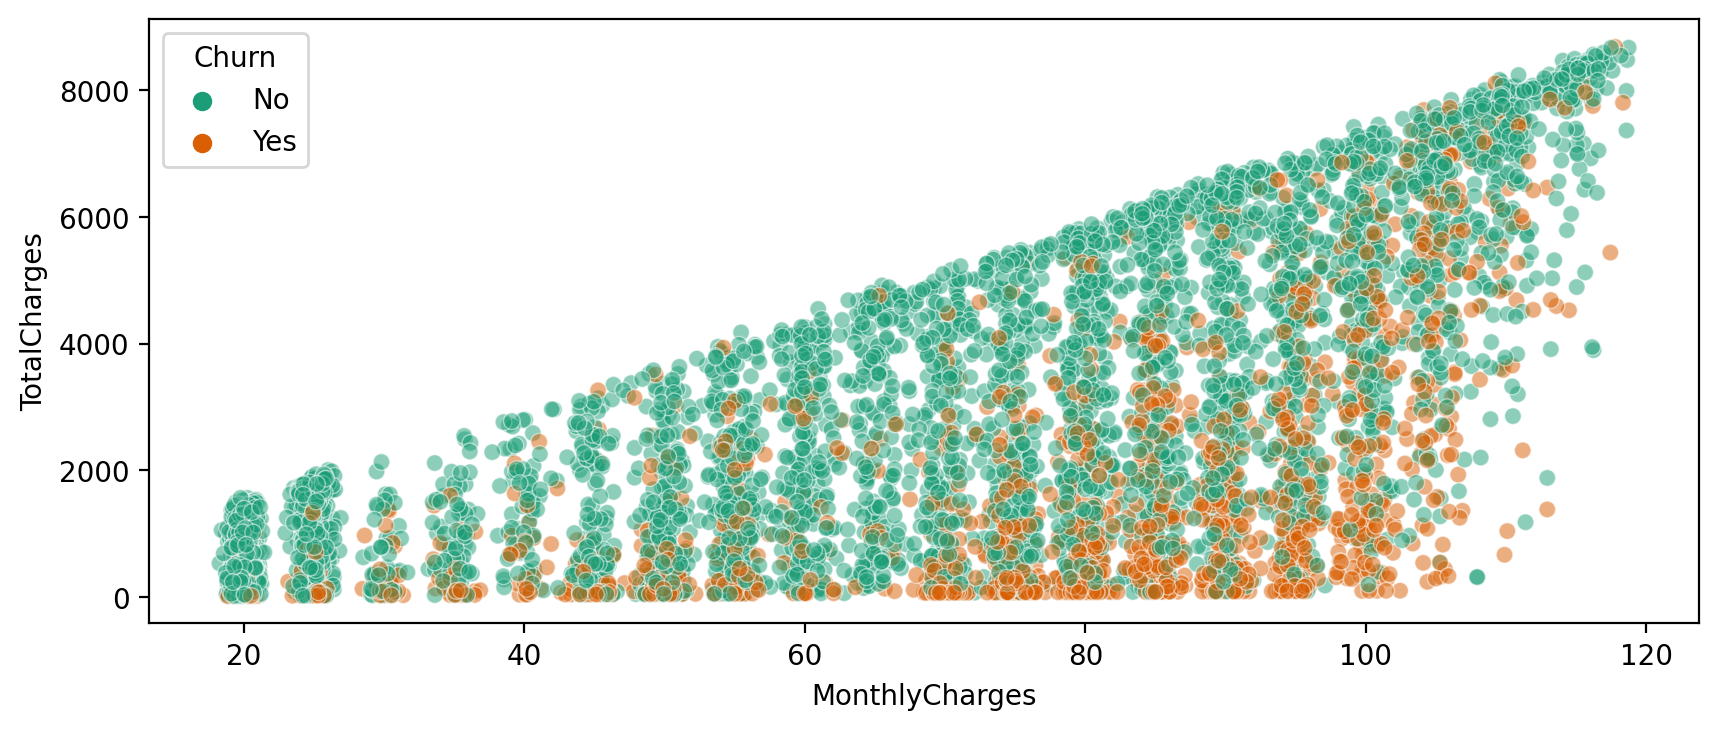

In [16]:
# Displaying a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.5,linewidth=0.5,palette='Dark2');

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [17]:
# treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
churn_rate = 100*yes_churn / (yes_churn+no_churn)
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

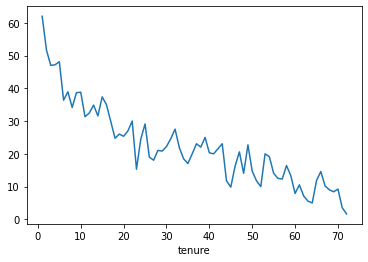

In [18]:
# creating a plot showing churn rate per months of tenure
churn_rate.transpose()['customerID'].plot();

In [19]:
# create a new column called Tenure Cohort, based on the tenure column values

def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'    

In [20]:
# Applying the function created above
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [21]:
# Displaying the old and the new tenure feature
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


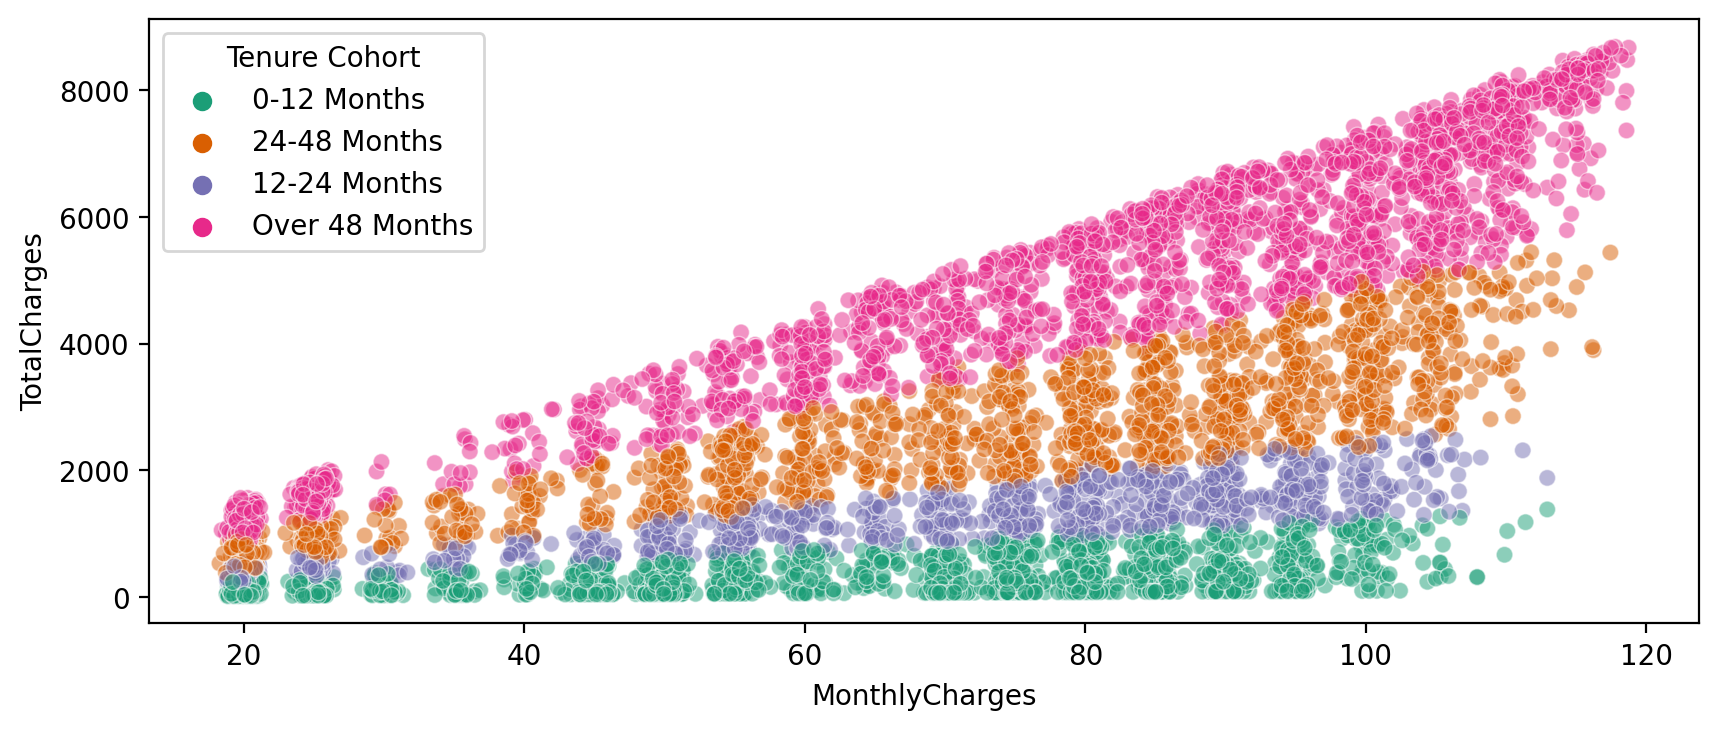

In [22]:
# Creating a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined above 

plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',alpha=0.5,linewidth=0.5,palette='Dark2');

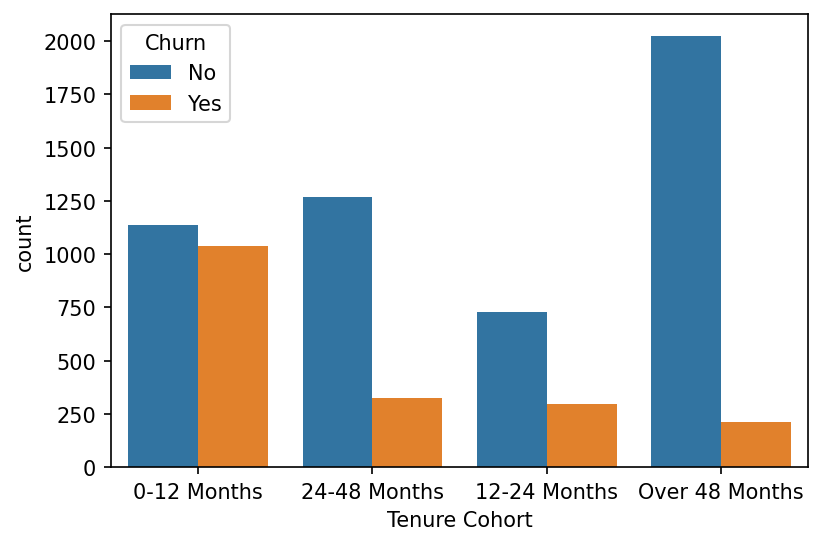

In [23]:
# Creating a count plot showing the churn count per cohort

plt.figure(figsize=(6,4),dpi=150)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn');

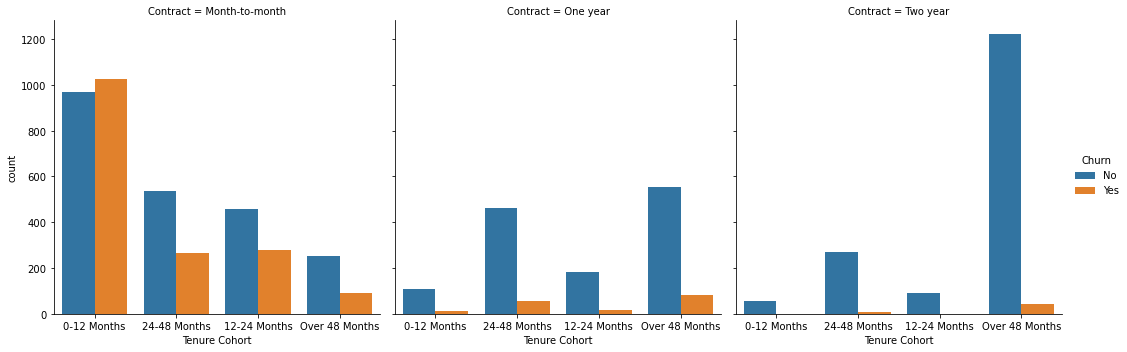

In [24]:
# Creating a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue

sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count');

-----

# Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**

----
## Single Decision Tree

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score

In [26]:
# Separating out the data into X features and Y label. 
# Creating dummy variables where necessary and droping variable that shouldn't be useful


X = df
X = pd.get_dummies(df.drop(columns=['customerID', 'Churn',]), drop_first=True)
X = X.drop(columns=['StreamingMovies_Yes', 'Tenure Cohort_12-24 Months',
       'Tenure Cohort_24-48 Months', 'PaymentMethod_Credit card (automatic)',
       'PaperlessBilling_Yes', 'PaymentMethod_Mailed check',
       'DeviceProtection_No internet service',
       'StreamingMovies_No internet service', 'StreamingTV_Yes',
       'StreamingTV_No internet service', 'TechSupport_No internet service',
       'DeviceProtection_Yes', 'OnlineBackup_No internet service',
       'InternetService_No', 'Dependents_Yes', 'Partner_Yes',
       'Tenure Cohort_Over 48 Months'])

y = df['Churn']

In [27]:
# Splitting the data and running the classifier with max_depth=6

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

dt_clf = DecisionTreeClassifier(max_depth=6)

dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



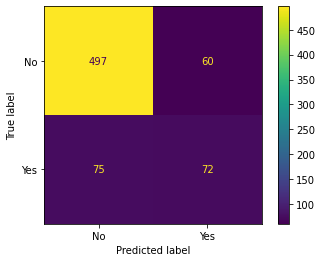

In [30]:
ConfusionMatrixDisplay.from_estimator(dt_clf,X_test,y_test);

In [31]:
# Displaying the feature importance into a Dataframe
imp_feat = pd.DataFrame(data=dt_clf.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)
imp_feat[imp_feat['Feature Importance']==0].index

Index([], dtype='object')

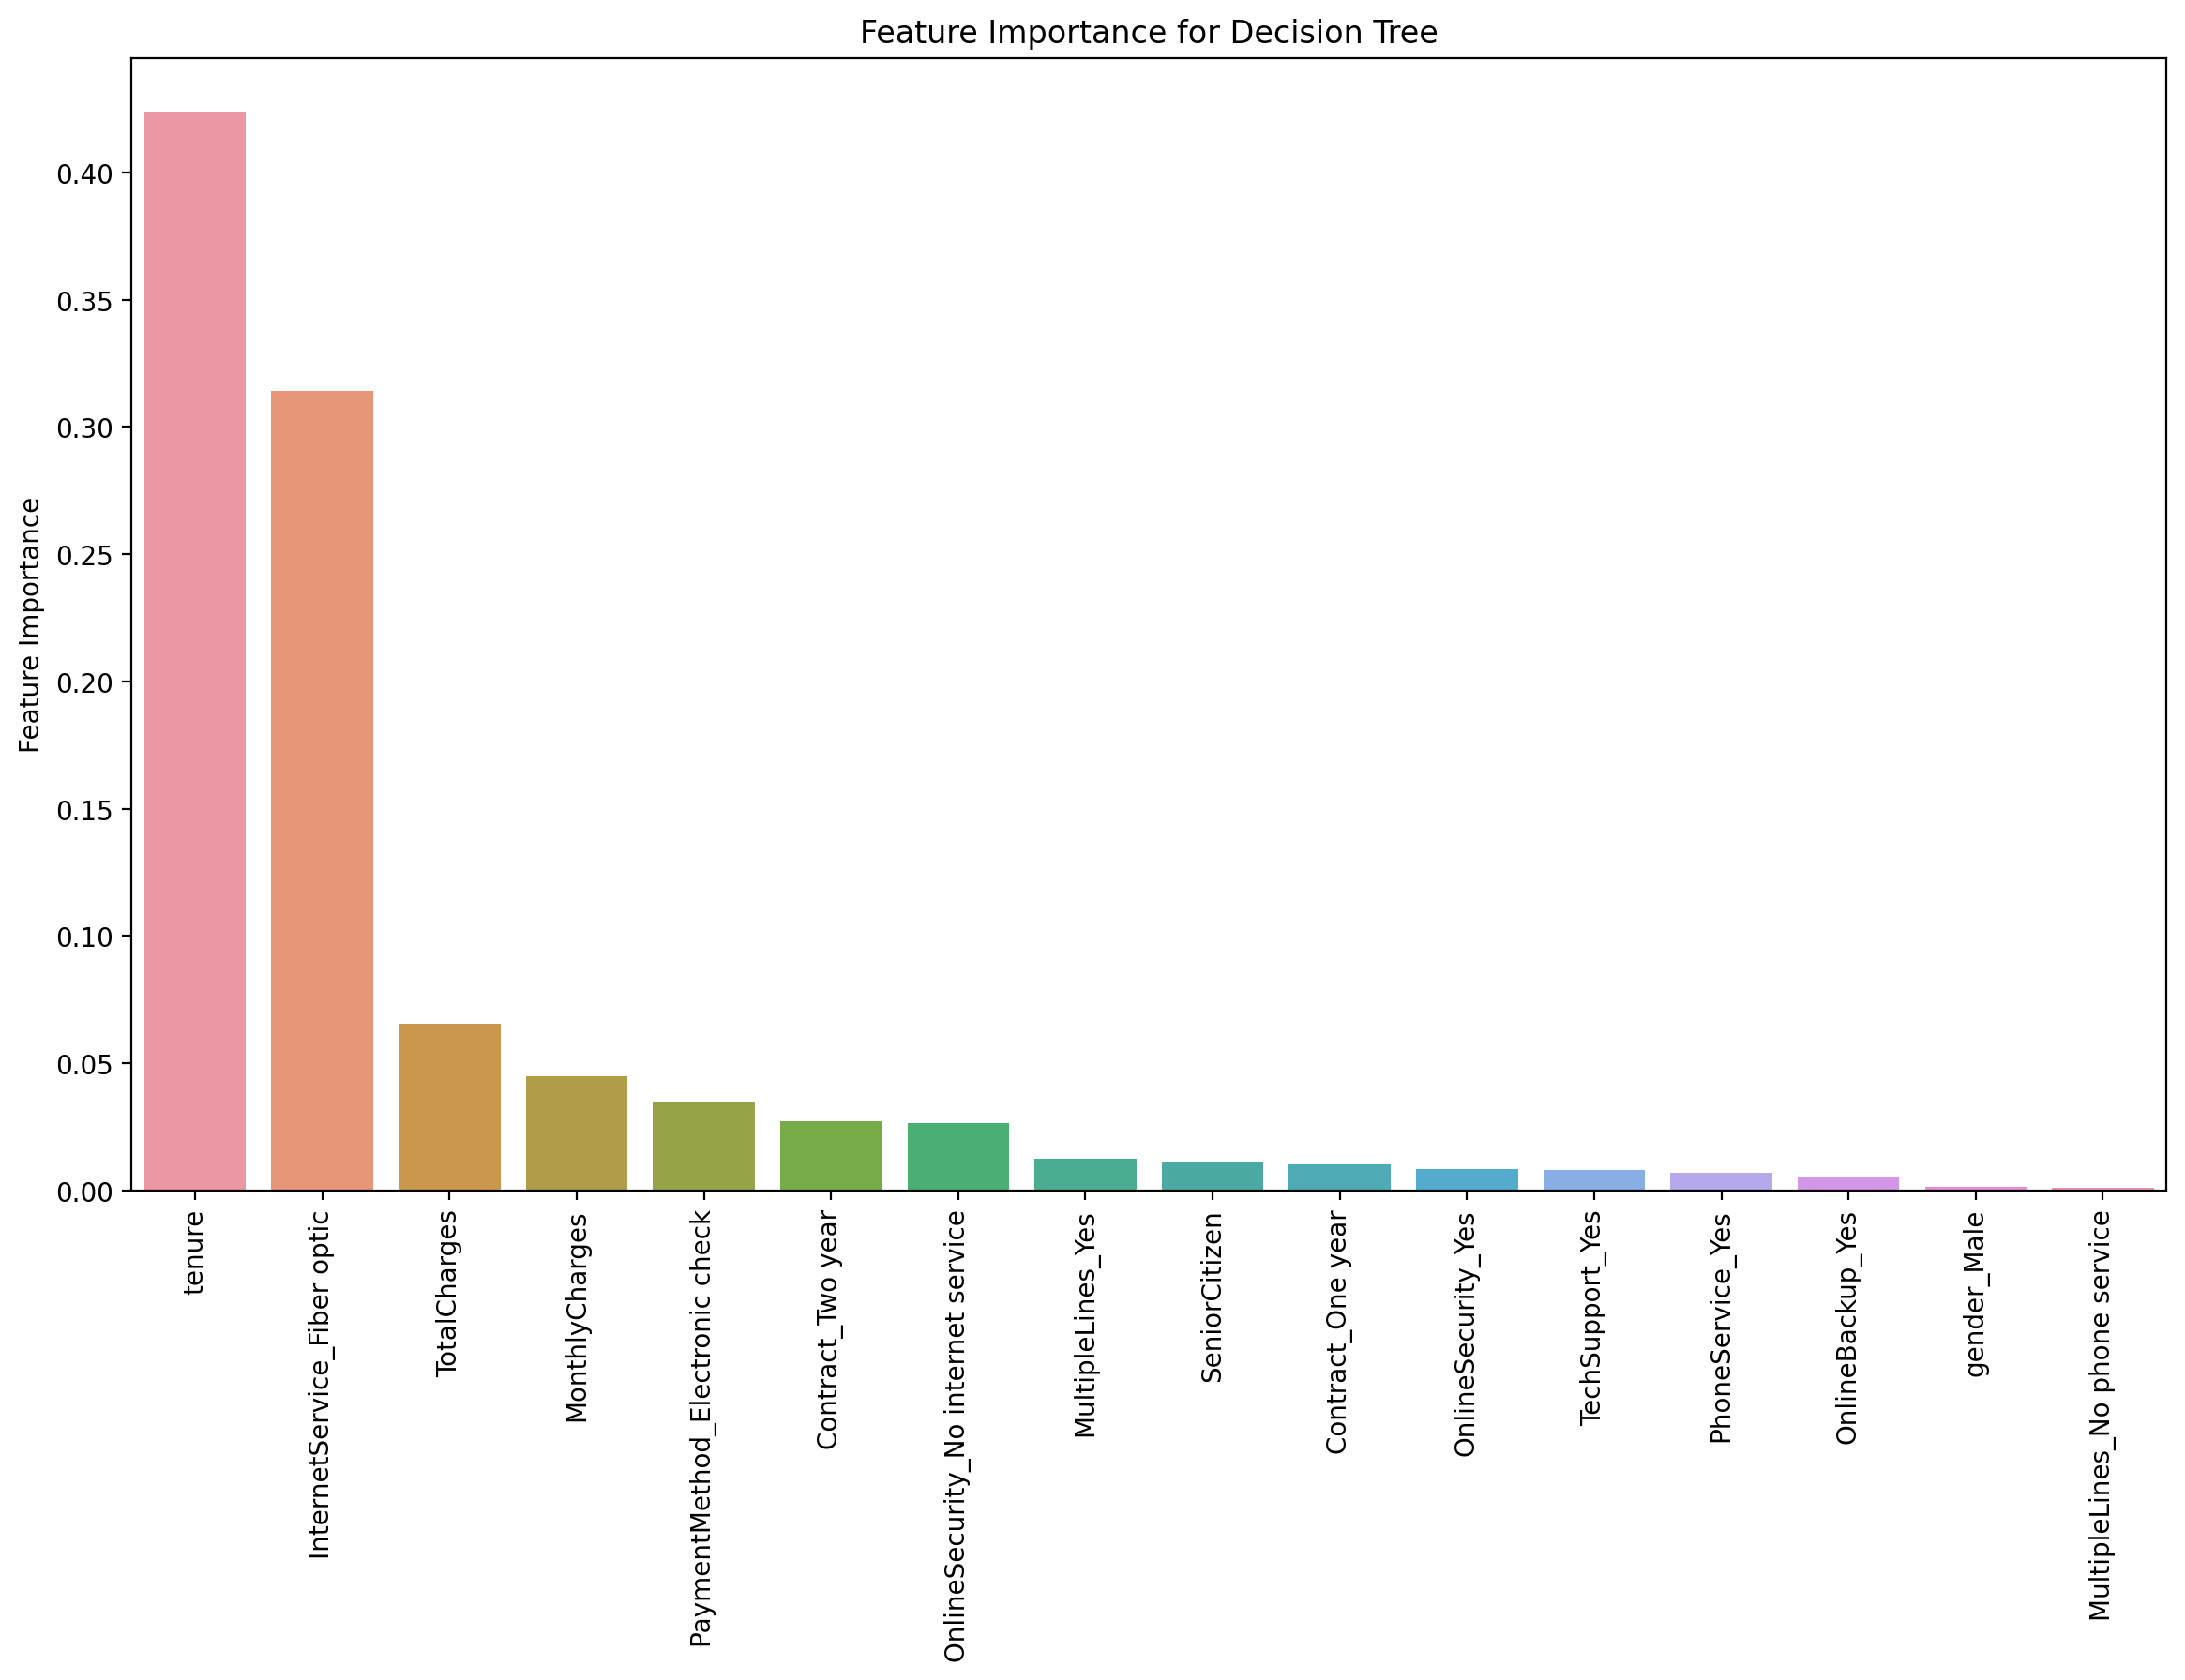

In [32]:
# Plotting the feature importances
plt.figure(figsize=(14,8),dpi=200)
sns.barplot(data=imp_feat,x=imp_feat.index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance for Decision Tree');

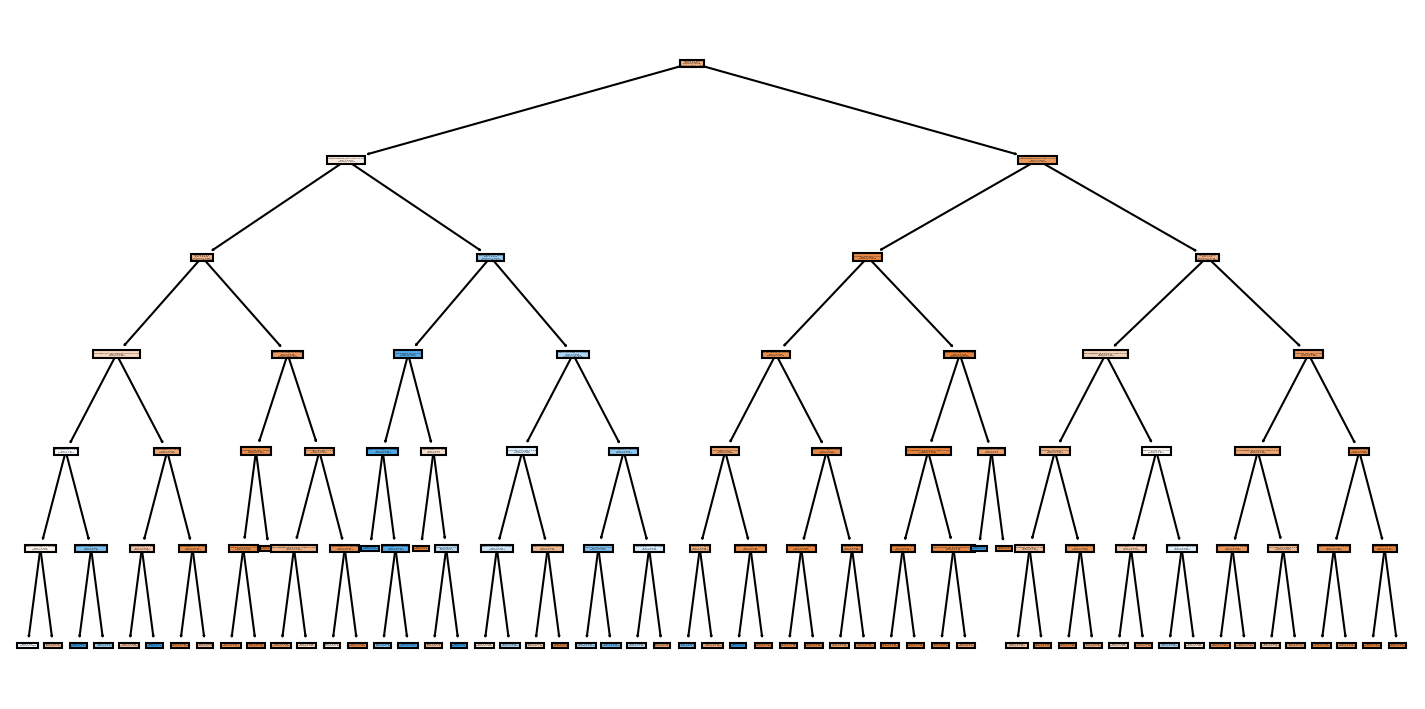

In [33]:
# Plotting the predict Tree
plt.figure(figsize=(12,6),dpi=150)
plot_tree(dt_clf,filled=True,feature_names=X.columns);

## Random Forest

**Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [34]:
errors = []
misclassification = []

X = df
X = pd.get_dummies(df.drop(columns=['customerID', 'Churn',]), drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Measuring which is the ideal number of trees trought a loop for

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n, max_features=2)
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test,y_pred)
    n_missed = np.sum(y_pred != y_test)
    errors.append(err)
    misclassification.append(n_missed)

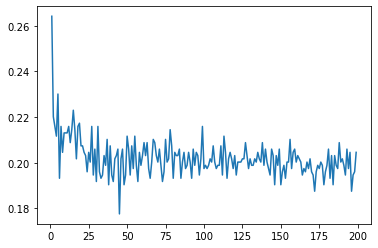

In [35]:
# Plotting the results with the accuracy score for each amount of trees
plt.plot(range(1,200),errors);

In [36]:
# Using 50 trees who was the best result from the plot above

X = df
X = pd.get_dummies(df.drop(columns=['customerID', 'Churn',]), drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

rfc = RandomForestClassifier(n_estimators=50,max_depth=5)

rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89       557
         Yes       0.61      0.40      0.49       147

    accuracy                           0.82       704
   macro avg       0.73      0.67      0.69       704
weighted avg       0.81      0.82      0.81       704



In [37]:
# Displaying the feature importance into a Dataframe
imp_feat_rfc = pd.DataFrame(data=rfc.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)
imp_feat_rfc

,Feature Importance
tenure,0.212920
InternetService_Fiber optic,0.096610
TotalCharges,0.096522
PaymentMethod_Electronic check,0.088852
Contract_Two year,0.083527
Tenure Cohort_Over 48 Months,0.081899
MonthlyCharges,0.043437
TechSupport_No internet service,0.035537
OnlineSecurity_No internet service,0.027922
OnlineSecurity_Yes,0.024590


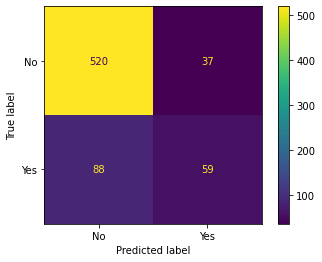

In [38]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test,y_test);

## Boosted Trees

**Will be used AdaBoost to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [39]:
error_rates = []

# Measuring which is the ideal number of estimators trought a loop for

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    error = 1 - accuracy_score(y_test,y_pred)
    error_rates.append(error)

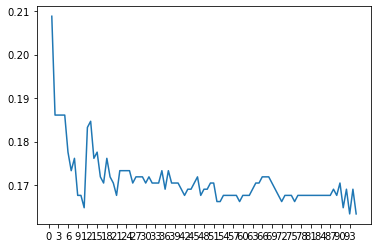

In [40]:
# Plotting the results with the accuracy score for each amount of estimators
plt.plot(range(1,96), error_rates)
plt.xticks(np.arange(0, 96, step=3));

In [41]:
# Using 11 estimators who was the best result from the plot above

ada = AdaBoostClassifier(n_estimators=11)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.94      0.90       557
         Yes       0.65      0.45      0.53       147

    accuracy                           0.84       704
   macro avg       0.76      0.69      0.72       704
weighted avg       0.82      0.84      0.82       704



**Analyzing the results, the model who get the best performance was AdaBoostClassifier.**